# <p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Analyzing Marketing Campaings</p>


The data is a sample of a random marketing campaing. The goal is to find interesting insights from this data ir order to improve business practices and reducing risk on future promotions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served','date_subscribed','date_canceled'])
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LIST OF CONTENTS</p>   

    
* [1. Data Cleaning](#1)
    
* [2. Feature Engineering](#2)
    
* [3. Exploratory Data Analysis](#3)
    
* [4. A/B Testing](#4)
    
* [5. Conclusions](#5)

<a id="1"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>

In [2]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


<AxesSubplot:>

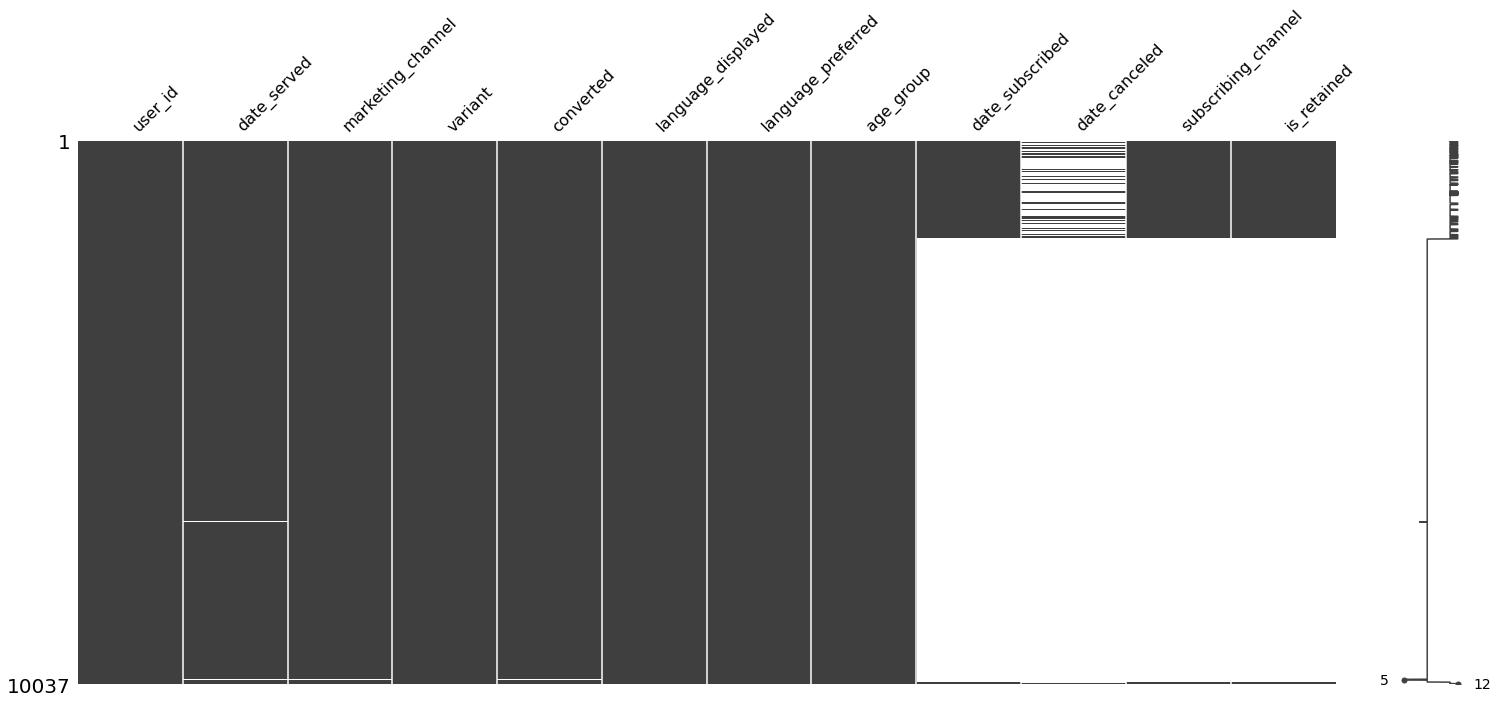

In [3]:
import missingno as msno

msno.matrix(marketing)

In [4]:
marketing.isna().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

In [5]:
marketing = marketing.dropna(subset=['date_served'])
marketing.isna().sum()

user_id                   0
date_served               0
marketing_channel         0
variant                   0
converted                 0
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8165
date_canceled          9444
subscribing_channel    8165
is_retained            8165
dtype: int64

<a id="2"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">FEATURE ENGINEERING</p>

### 1. Channel Code

In [6]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)
marketing['channel_code'].value_counts()

2.0    600
3.0    445
1.0    354
4.0    290
5.0    167
Name: channel_code, dtype: int64

In [7]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10021 entries, 0 to 10036
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10021 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10021 non-null  object        
 3   variant              10021 non-null  object        
 4   converted            10021 non-null  object        
 5   language_displayed   10021 non-null  object        
 6   language_preferred   10021 non-null  object        
 7   age_group            10021 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  channel_code         1856 non-null   float64       
dtypes: datetime64[ns](3), float64(1

### 2. Day of Week

In [8]:
# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [9]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,0.0


<a id="3"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>

### Conversion Rate

In [10]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers / total
print("The general conversion rate is:", round(conversion_rate*100, 2), "%")

The general conversion rate is: 13.92 %


In [11]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.94 %


In [12]:
def conversion_rate(dataframe, column_names):
    
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv / column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [13]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.figure(figsize=(15,5))
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

<AxesSubplot:xlabel='language_displayed'>

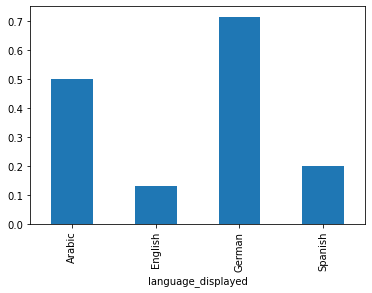

In [14]:
# Group by language_displayed and count unique users
language_conversion_rate = conversion_rate(marketing, 'language_displayed')
language_conversion_rate.plot(kind='bar')

<AxesSubplot:xlabel='date_served'>

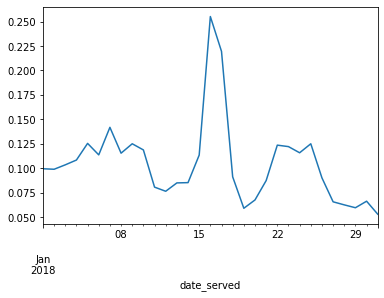

In [15]:
# Group by date_served and count unique users
date_served = conversion_rate(marketing, ['date_served'])
date_served.plot()

<AxesSubplot:xlabel='marketing_channel'>

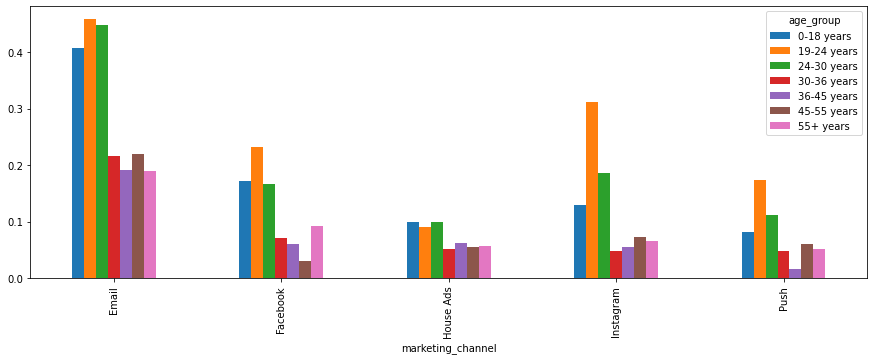

In [16]:
channel_age = conversion_rate(marketing, ['marketing_channel', 'age_group'])
# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))
channel_age_df.plot(kind='bar', figsize=(15,5))

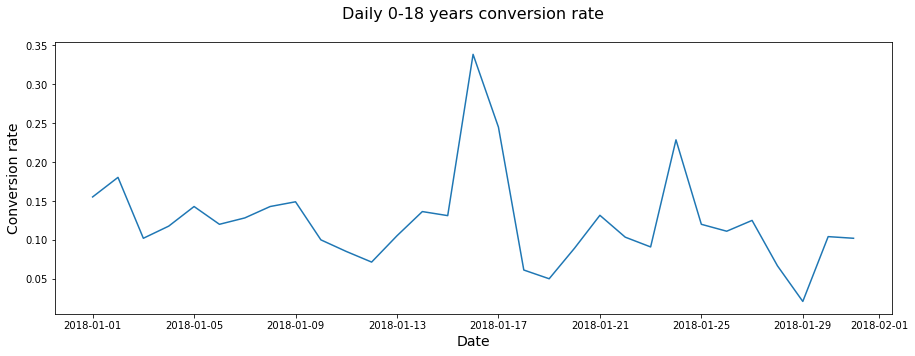

<Figure size 432x288 with 0 Axes>

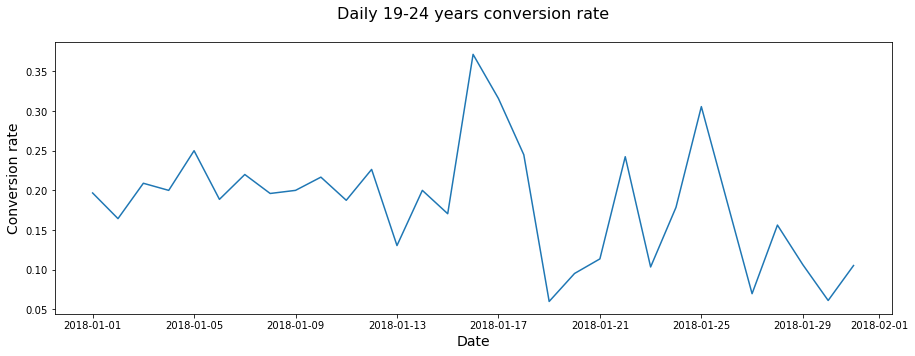

<Figure size 432x288 with 0 Axes>

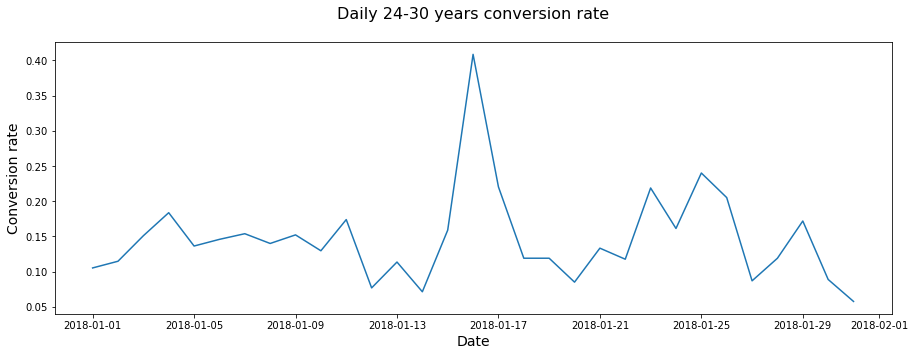

<Figure size 432x288 with 0 Axes>

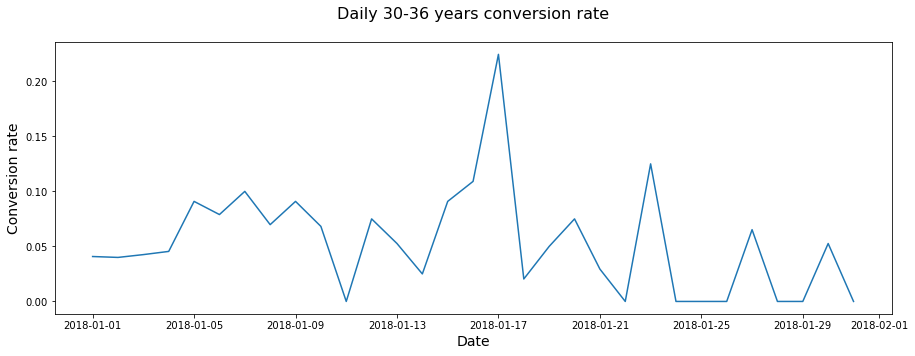

<Figure size 432x288 with 0 Axes>

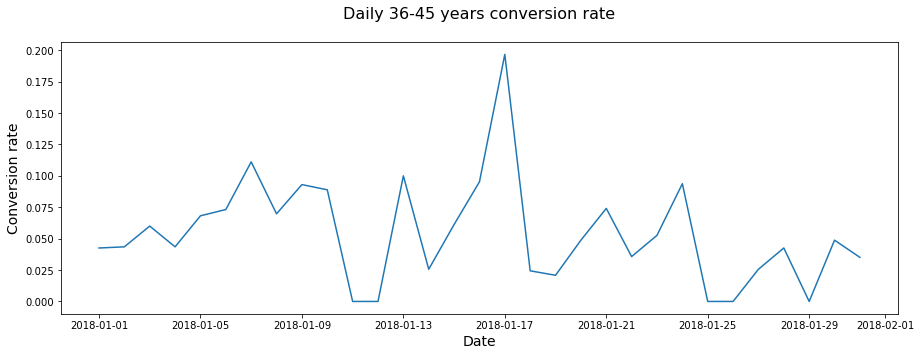

<Figure size 432x288 with 0 Axes>

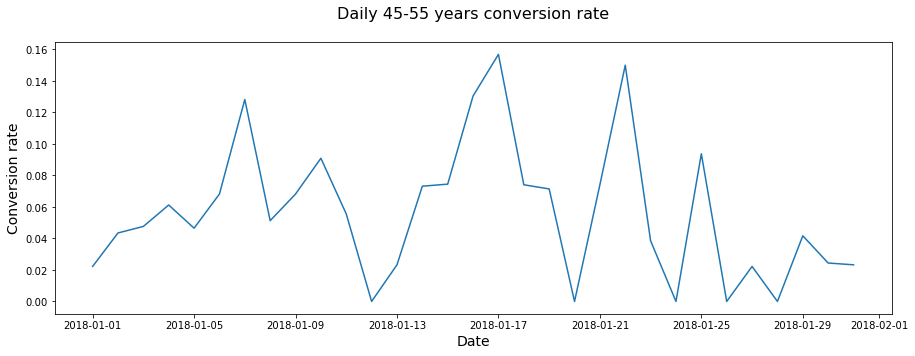

<Figure size 432x288 with 0 Axes>

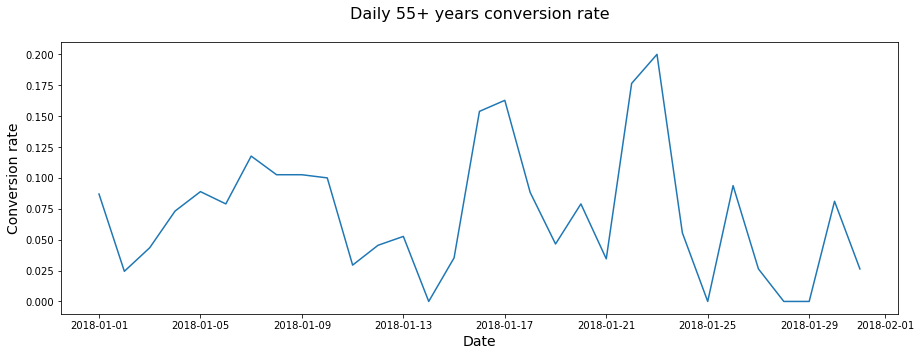

<Figure size 432x288 with 0 Axes>

In [17]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))
plotting_conv(age_group_df)

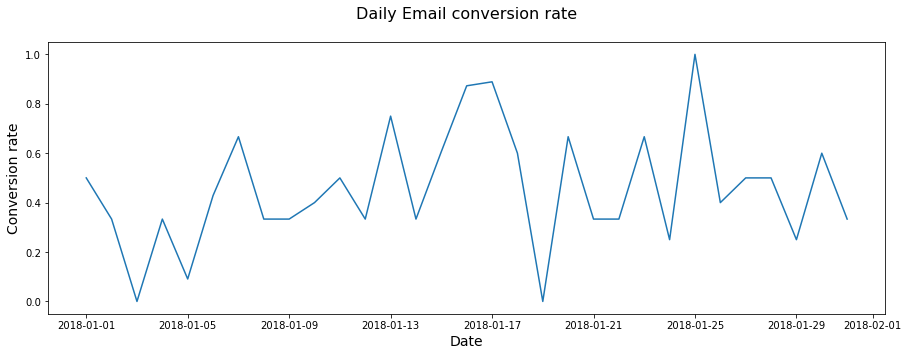

<Figure size 432x288 with 0 Axes>

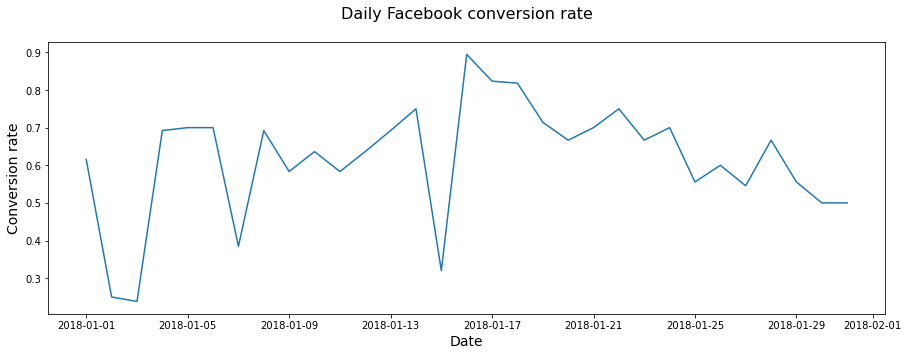

<Figure size 432x288 with 0 Axes>

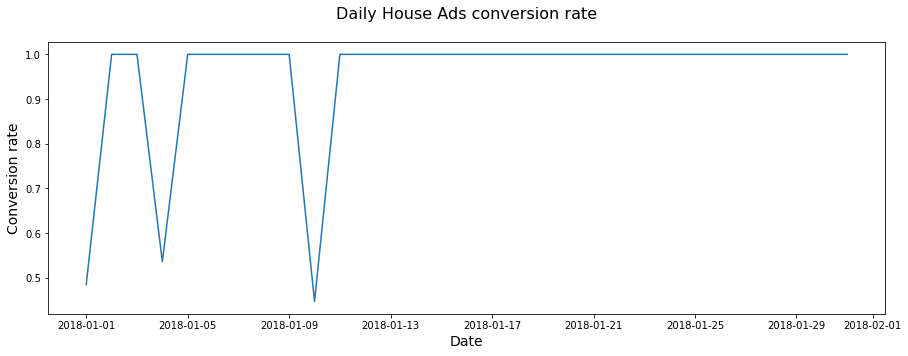

<Figure size 432x288 with 0 Axes>

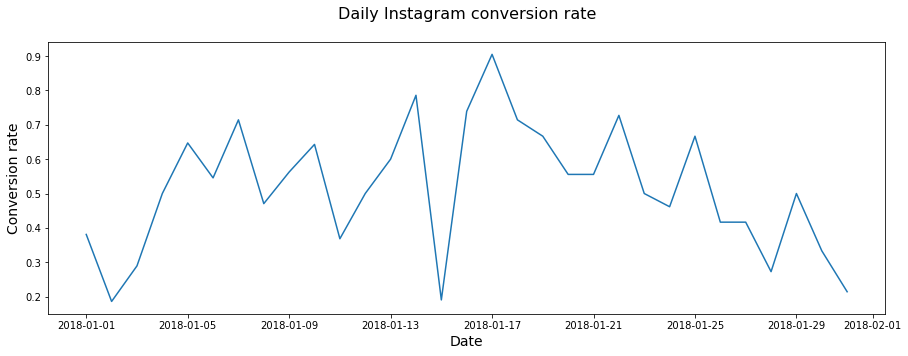

<Figure size 432x288 with 0 Axes>

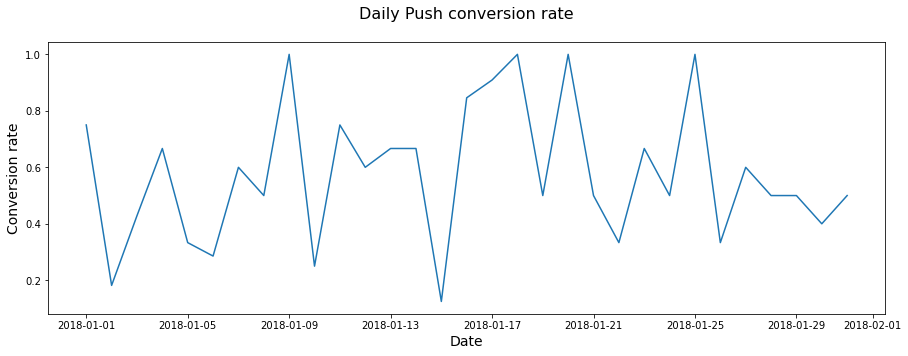

<Figure size 432x288 with 0 Axes>

In [18]:
# Calculate conversion rate by age_group
date_channel = conversion_rate(marketing, ['date_served', 'subscribing_channel'])
# Unstack and create a DataFrame
date_channel = pd.DataFrame(date_channel.unstack(level=1))
plotting_conv(date_channel)

### Retention Rate

In [19]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained / total_subscribers
print("The general retention rate is:", round(retention_rate*100, 2), "%")

The general retention rate is: 66.8 %


In [20]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()

# Calculate conversion rate
conversion = subscribers/total
print('English speaker conversion rate:',  round(conversion*100,2), '%')

English speaker conversion rate: 12.94 %


In [21]:
def retention_rate(dataframe, column_names):
    
    # Total number of converted users
    column_ret = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    retention_rate = column_ret / column_total
    
    # Fill missing values with 0
    retention_rate = retention_rate.fillna(0)
    return retention_rate

In [22]:
def plotting_ret(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.figure(figsize=(15,5))
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' retention rate\n', 
                  size = 16)
        plt.ylabel('Retention rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

In [23]:
retention_rate = retention_rate(marketing, ['date_subscribed','subscribing_channel'])

In [24]:
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))
retention_rate_df.head()

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.75,1.000000,0.588235,0.625000,1.000000
2018-01-03,0.00,0.800000,0.647059,0.909091,0.666667
2018-01-04,0.50,0.666667,0.466667,0.500000,0.000000
2018-01-05,1.00,0.571429,0.500000,0.636364,1.000000


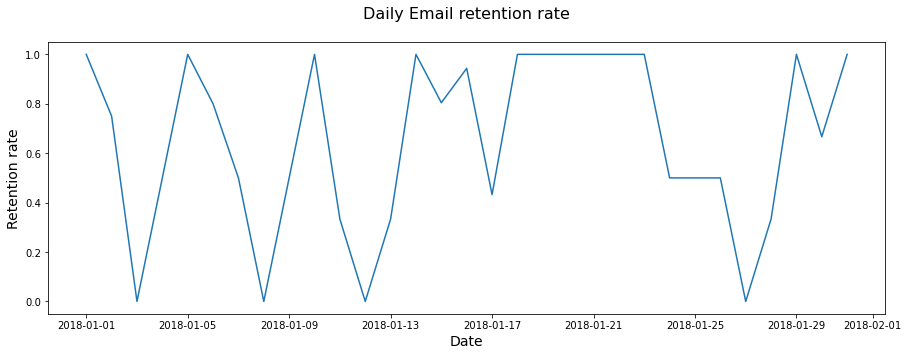

<Figure size 432x288 with 0 Axes>

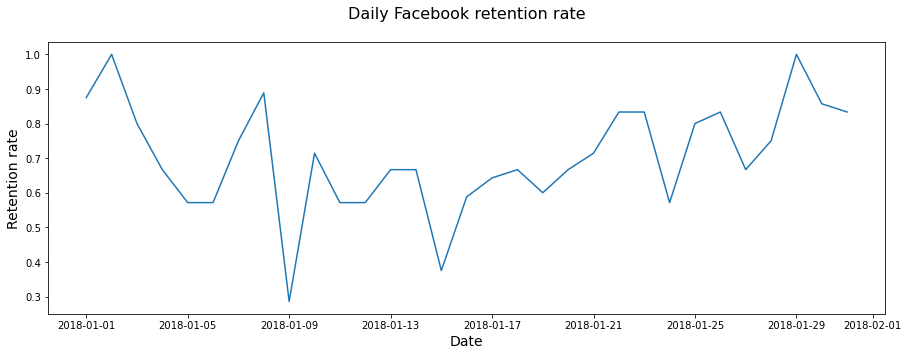

<Figure size 432x288 with 0 Axes>

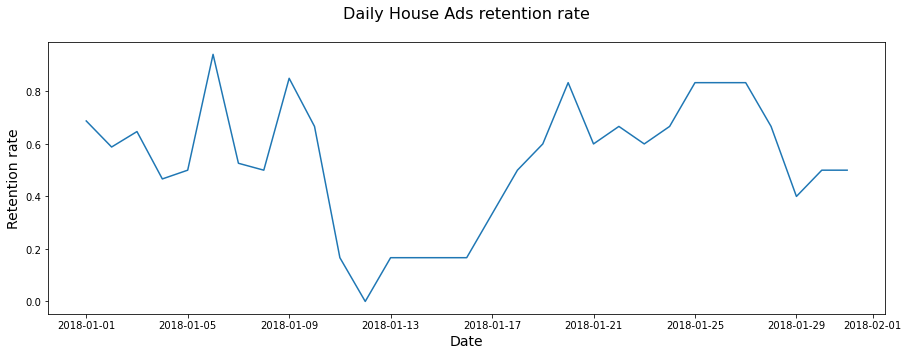

<Figure size 432x288 with 0 Axes>

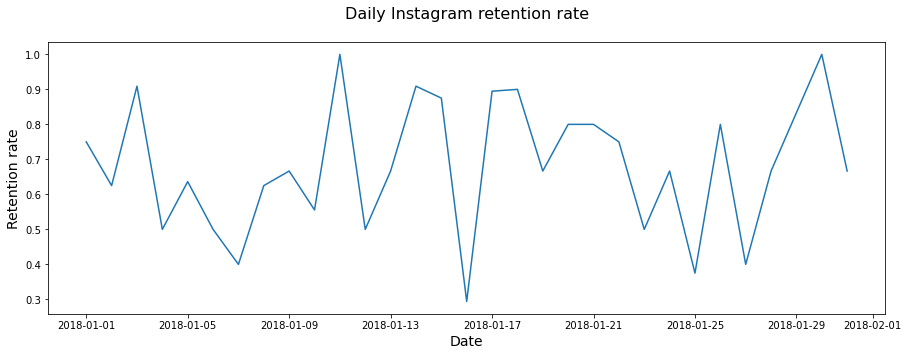

<Figure size 432x288 with 0 Axes>

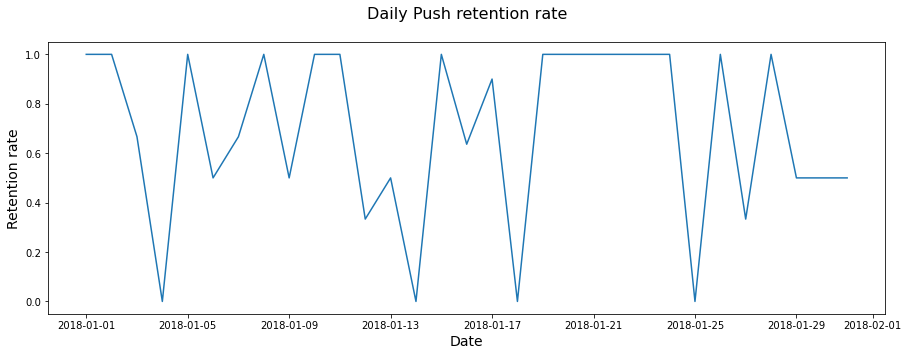

<Figure size 432x288 with 0 Axes>

In [25]:
plotting_ret(retention_rate_df)

# Inconsistencies

In [26]:
conversion_rate(marketing, ['date_subscribed','subscribing_channel'])

date_subscribed  subscribing_channel
2018-01-01       Email                  1.0
                 Facebook               1.0
                 House Ads              1.0
                 Instagram              1.0
                 Push                   1.0
                                       ... 
2018-01-31       Email                  1.0
                 Facebook               1.0
                 House Ads              1.0
                 Instagram              1.0
                 Push                   1.0
Name: user_id, Length: 155, dtype: float64

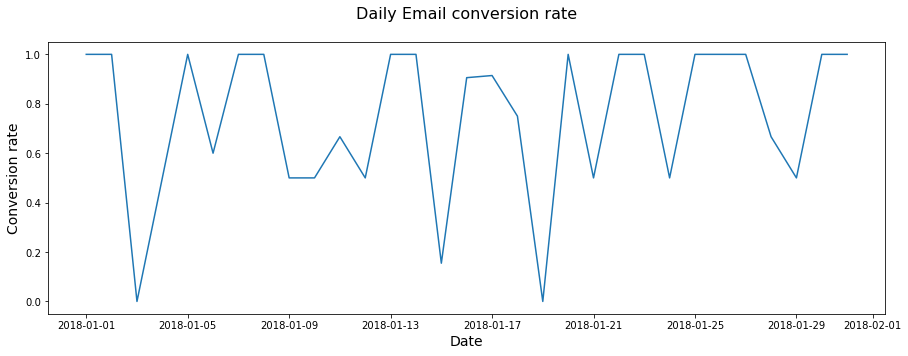

<Figure size 432x288 with 0 Axes>

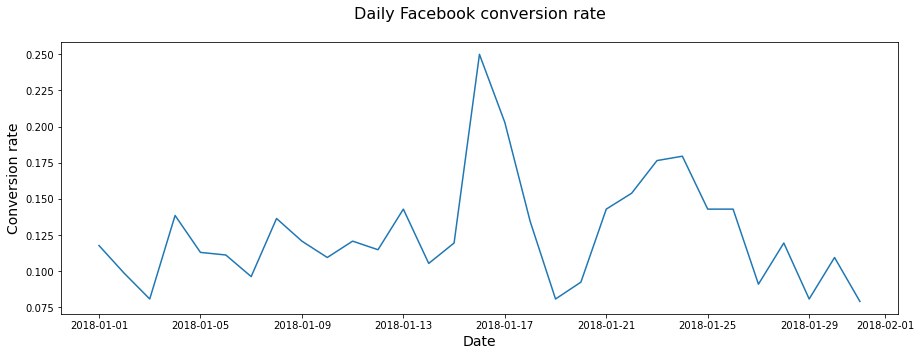

<Figure size 432x288 with 0 Axes>

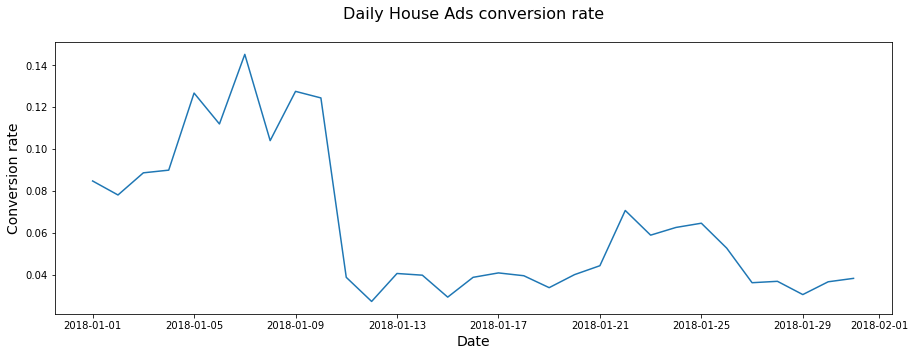

<Figure size 432x288 with 0 Axes>

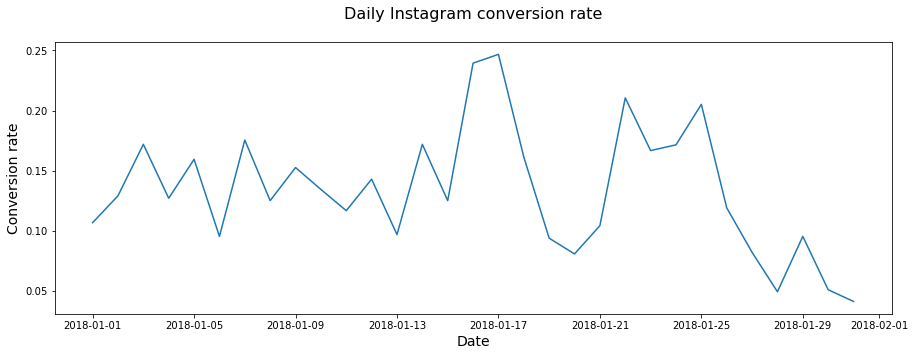

<Figure size 432x288 with 0 Axes>

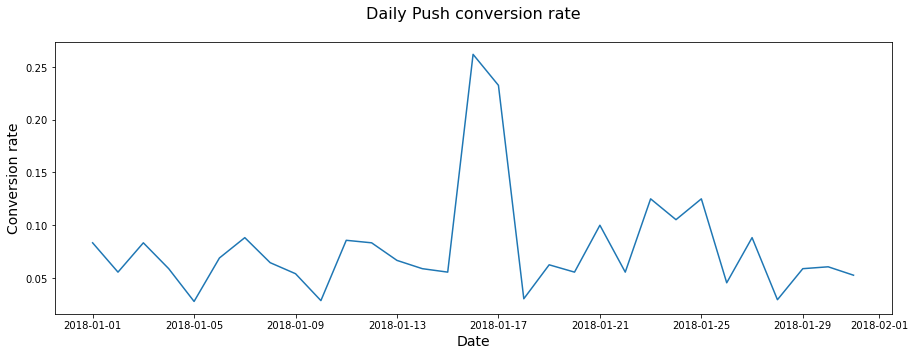

<Figure size 432x288 with 0 Axes>

In [27]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

> **There is a sudden decrease in conversion rate on January 11.**

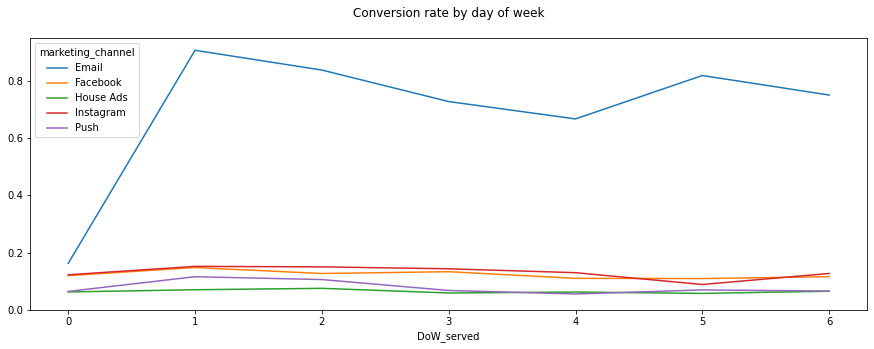

In [28]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot(figsize=(15,5))
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

> **Email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday.**
### House Ads Conversion Rate

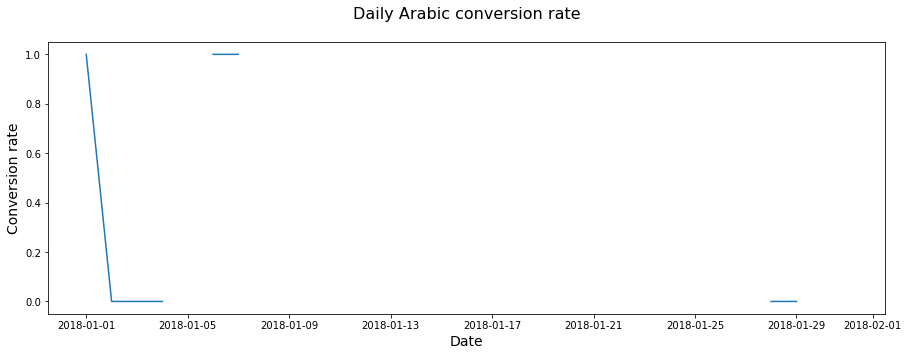

<Figure size 432x288 with 0 Axes>

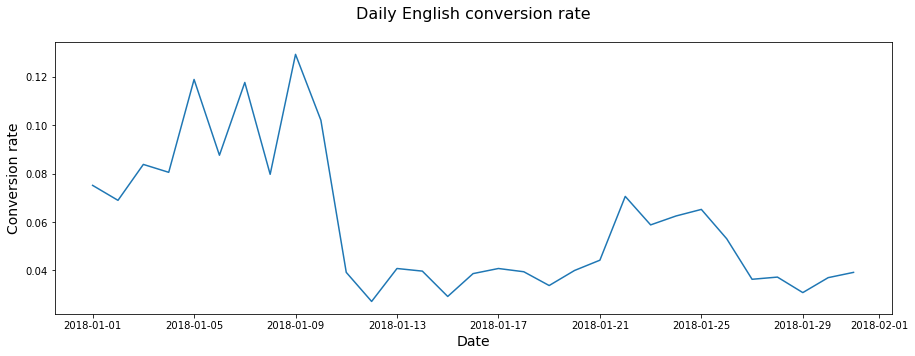

<Figure size 432x288 with 0 Axes>

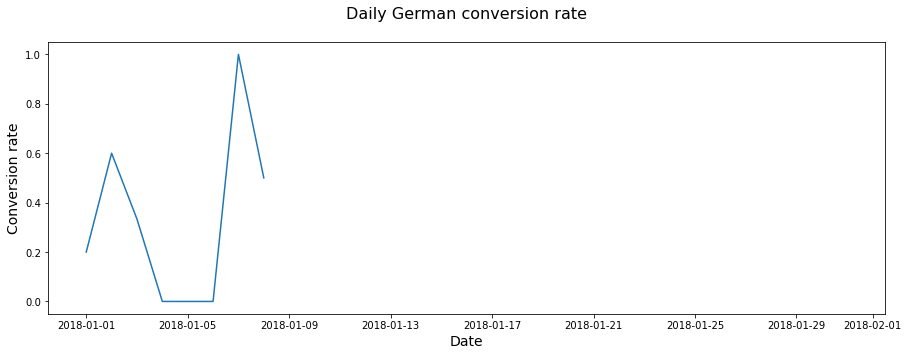

<Figure size 432x288 with 0 Axes>

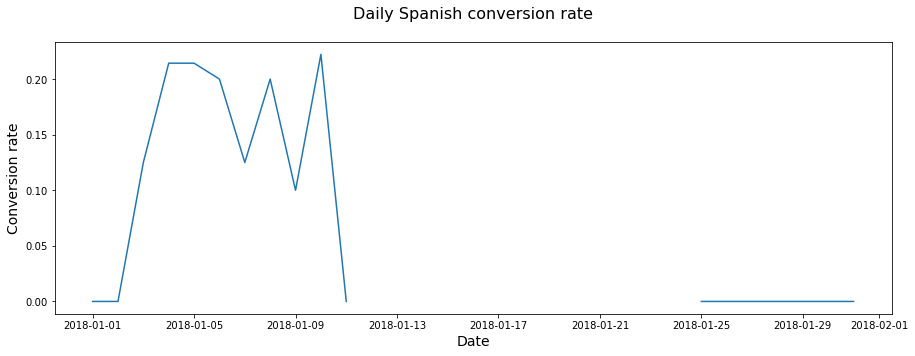

<Figure size 432x288 with 0 Axes>

In [29]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

In [30]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)
language_check_df

is_correct_lang,No,Yes
date_served,,
2018-01-01,2.0,189.0
2018-01-02,3.0,247.0
2018-01-03,0.0,220.0
2018-01-04,0.0,168.0
2018-01-05,0.0,160.0
2018-01-06,1.0,151.0
2018-01-07,2.0,130.0
2018-01-08,0.0,154.0
2018-01-09,0.0,157.0


> **The English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.**

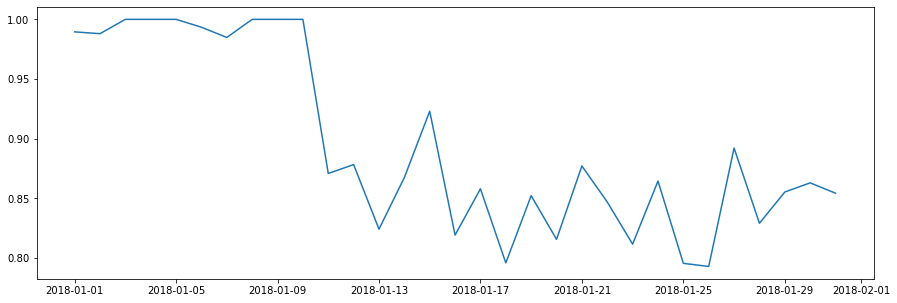

In [31]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.figure(figsize=(15,5))
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

>  **House ads have been underperforming due to serving all ads in English rather than each user's preferred language.**

<a id="4"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">A/B TESTING</p>


**The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.**

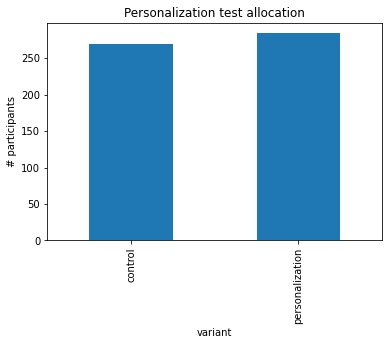

In [32]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby('variant')['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

> **There's a slight difference in allocation, but it's within the expected range.**

In [33]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


> **Note that personalization converted users at a higher rate than the control.**

# Lift and Statistical Significance

**LIFT: "Was the conversion rate higher for the tratment and by how much?"**


In [34]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'

In [35]:
# Print lift() with control and personalization as inputs
lift(control, personalization)

'38.85%'

**Statistical Significance**

We are going to perform a two sample t-test.

In [36]:
from scipy.stats import ttest_ind
t = ttest_ind(control, personalization)
print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)


> **The personalization results are highly statistically significant with p = 0.006.**

In [37]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
    print(subsegment)
      
    # Limit marketing to email and subsegment      
    email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

    subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
    subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
    control = subscribers['control'].dropna()
    personalization = subscribers['personalization'].dropna()

    print('lift:', lift(control, personalization))
    print('t-statistic:', ttest_ind(control, personalization), '\n\n')

In [38]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [39]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




> **Found that personalization was extremely effective for younger groups but less effective than the control for older groups.**

> One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.


<a id="5"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSIONS</p>

**1. Conversion rate: 13.92%. German has the firt place in terms of conversion rate language. On the other hand, Email has the most conversion rate.**

**2. Retention rate: 12.94%. Email channel has the most retention rate.**

**3. House ads have been underperforming due to serving all ads in English rather than each user's preferred language. There is a bug that we need to be solve this inconsistency.**

**4. Found that personalization was extremely effective for younger groups but less effective than the control for older groups. Younger users understand how their data might be used online and think personalization is cool while older people might feel that this is a violation of their privacy. This could be one explanation.**